In [12]:
# %load kinase_single_well_spectra_experiment


# In[24]:


# get_ipython().run_line_magic('matplotlib', 'inline')
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
from matplotlib.offsetbox import AnchoredText
import matplotlib.cm as cm
import pandas as pd
from matplotlib.ticker import FormatStrFormatter
from matplotlib.ticker import FormatStrFormatter
import matplotlib


# In[13]:


import assaytools


# In[14]:


from assaytools import platereader


# In[15]:


filenames = [
    'p38_Bos_conc020180823_110129.xml',
    'p38_Bos_conc120180823_113047.xml',
    'p38_Bos_conc220180823_115951.xml',
    'p38_Bos_conc320180823_122855.xml',
    'p38_Bos_conc420180823_125800.xml',
    'p38_Bos_conc520180823_132708.xml',
    'p38_Bos_conc620180823_135617.xml',
    'p38_Bos_conc720180823_142528.xml',
    'p38_Bos_conc820180823_145513.xml',
    'p38_Bos_conc920180823_152426.xml',
    'p38_Bos_conc1020180823_155337.xml',
    'p38_Bos_conc1120180823_162247.xml',
    'p38_Bos_conc1220180823_165155.xml',
    'p38_Bos_conc1320180823_172108.xml',
    'p38_Bos_conc1420180823_175019.xml',
    'p38_Bos_conc1520180823_181931.xml',
    'p38_Bos_conc1620180823_184842.xml'
]

datapath = 'downloads/kinase-resistance-mutants-single-well-assay/single-well-assay/infinite_results'


# In[16]:


concentrations = np.array([  0.00000000e+00,   8.00000000e-09,   1.34778097e-08,
         2.27064194e-08,   3.82541000e-08,   6.44476851e-08,
         1.08576705e-07,   1.82922021e-07,   3.08173524e-07,
         5.19188015e-07,   8.74689659e-07,   1.47361260e-06, 2.48263378e-06,
         4.18255821e-06, 7.04646547e-06, 1.118713651e-05, 2.0e-05])


# In[17]:

reads = list()
nreads = len(filenames)
for read in range(nreads):
    read = platereader.read_icontrol_xml(os.path.join(datapath, filenames[read]))
    reads.append(read)


# In[18]:


plate_layout = pd.read_excel('downloads/kinase-resistance-mutants-single-well-assay/single-well-assay/20180823_Kinase_dispensing_for_binding_assay.xlsx', header=None)
plate_layout = plate_layout.loc[:, 0:1]
plate_layout.columns = ['well', 'name']
if len(list(plate_layout[plate_layout.well == 'A1'].name)[0].split('_')) > 0:
    list(plate_layout[plate_layout.well == 'A1'].name)[0].split('_')

/anaconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/axes/_base.py:3477: UserWarning: Attempted to set non-positive ylimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive ylimits for log-scale axis; '
/anaconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/axes/_base.py:3477: UserWarning: Attempted to set non-positive ylimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive ylimits for log-scale axis; '
/anaconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/axes/_base.py:3477: UserWarning: Attempted to set non-positive ylimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive ylimits for log-scale axis; '
/anaconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/axes/_base.py:3477: UserWarning: Attempted to set non-positive ylimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive ylimits for log-scale 

/anaconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/axes/_base.py:3477: UserWarning: Attempted to set non-positive ylimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive ylimits for log-scale axis; '
/anaconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/axes/_base.py:3477: UserWarning: Attempted to set non-positive ylimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive ylimits for log-scale axis; '
/anaconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/axes/_base.py:3477: UserWarning: Attempted to set non-positive ylimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive ylimits for log-scale axis; '
/anaconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/axes/_base.py:3477: UserWarning: Attempted to set non-positive ylimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive ylimits for log-scale 

/anaconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/axes/_base.py:3477: UserWarning: Attempted to set non-positive ylimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive ylimits for log-scale axis; '
/anaconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/axes/_base.py:3477: UserWarning: Attempted to set non-positive ylimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive ylimits for log-scale axis; '
/anaconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/axes/_base.py:3477: UserWarning: Attempted to set non-positive ylimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive ylimits for log-scale axis; '
/anaconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/axes/_base.py:3477: UserWarning: Attempted to set non-positive ylimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive ylimits for log-scale 

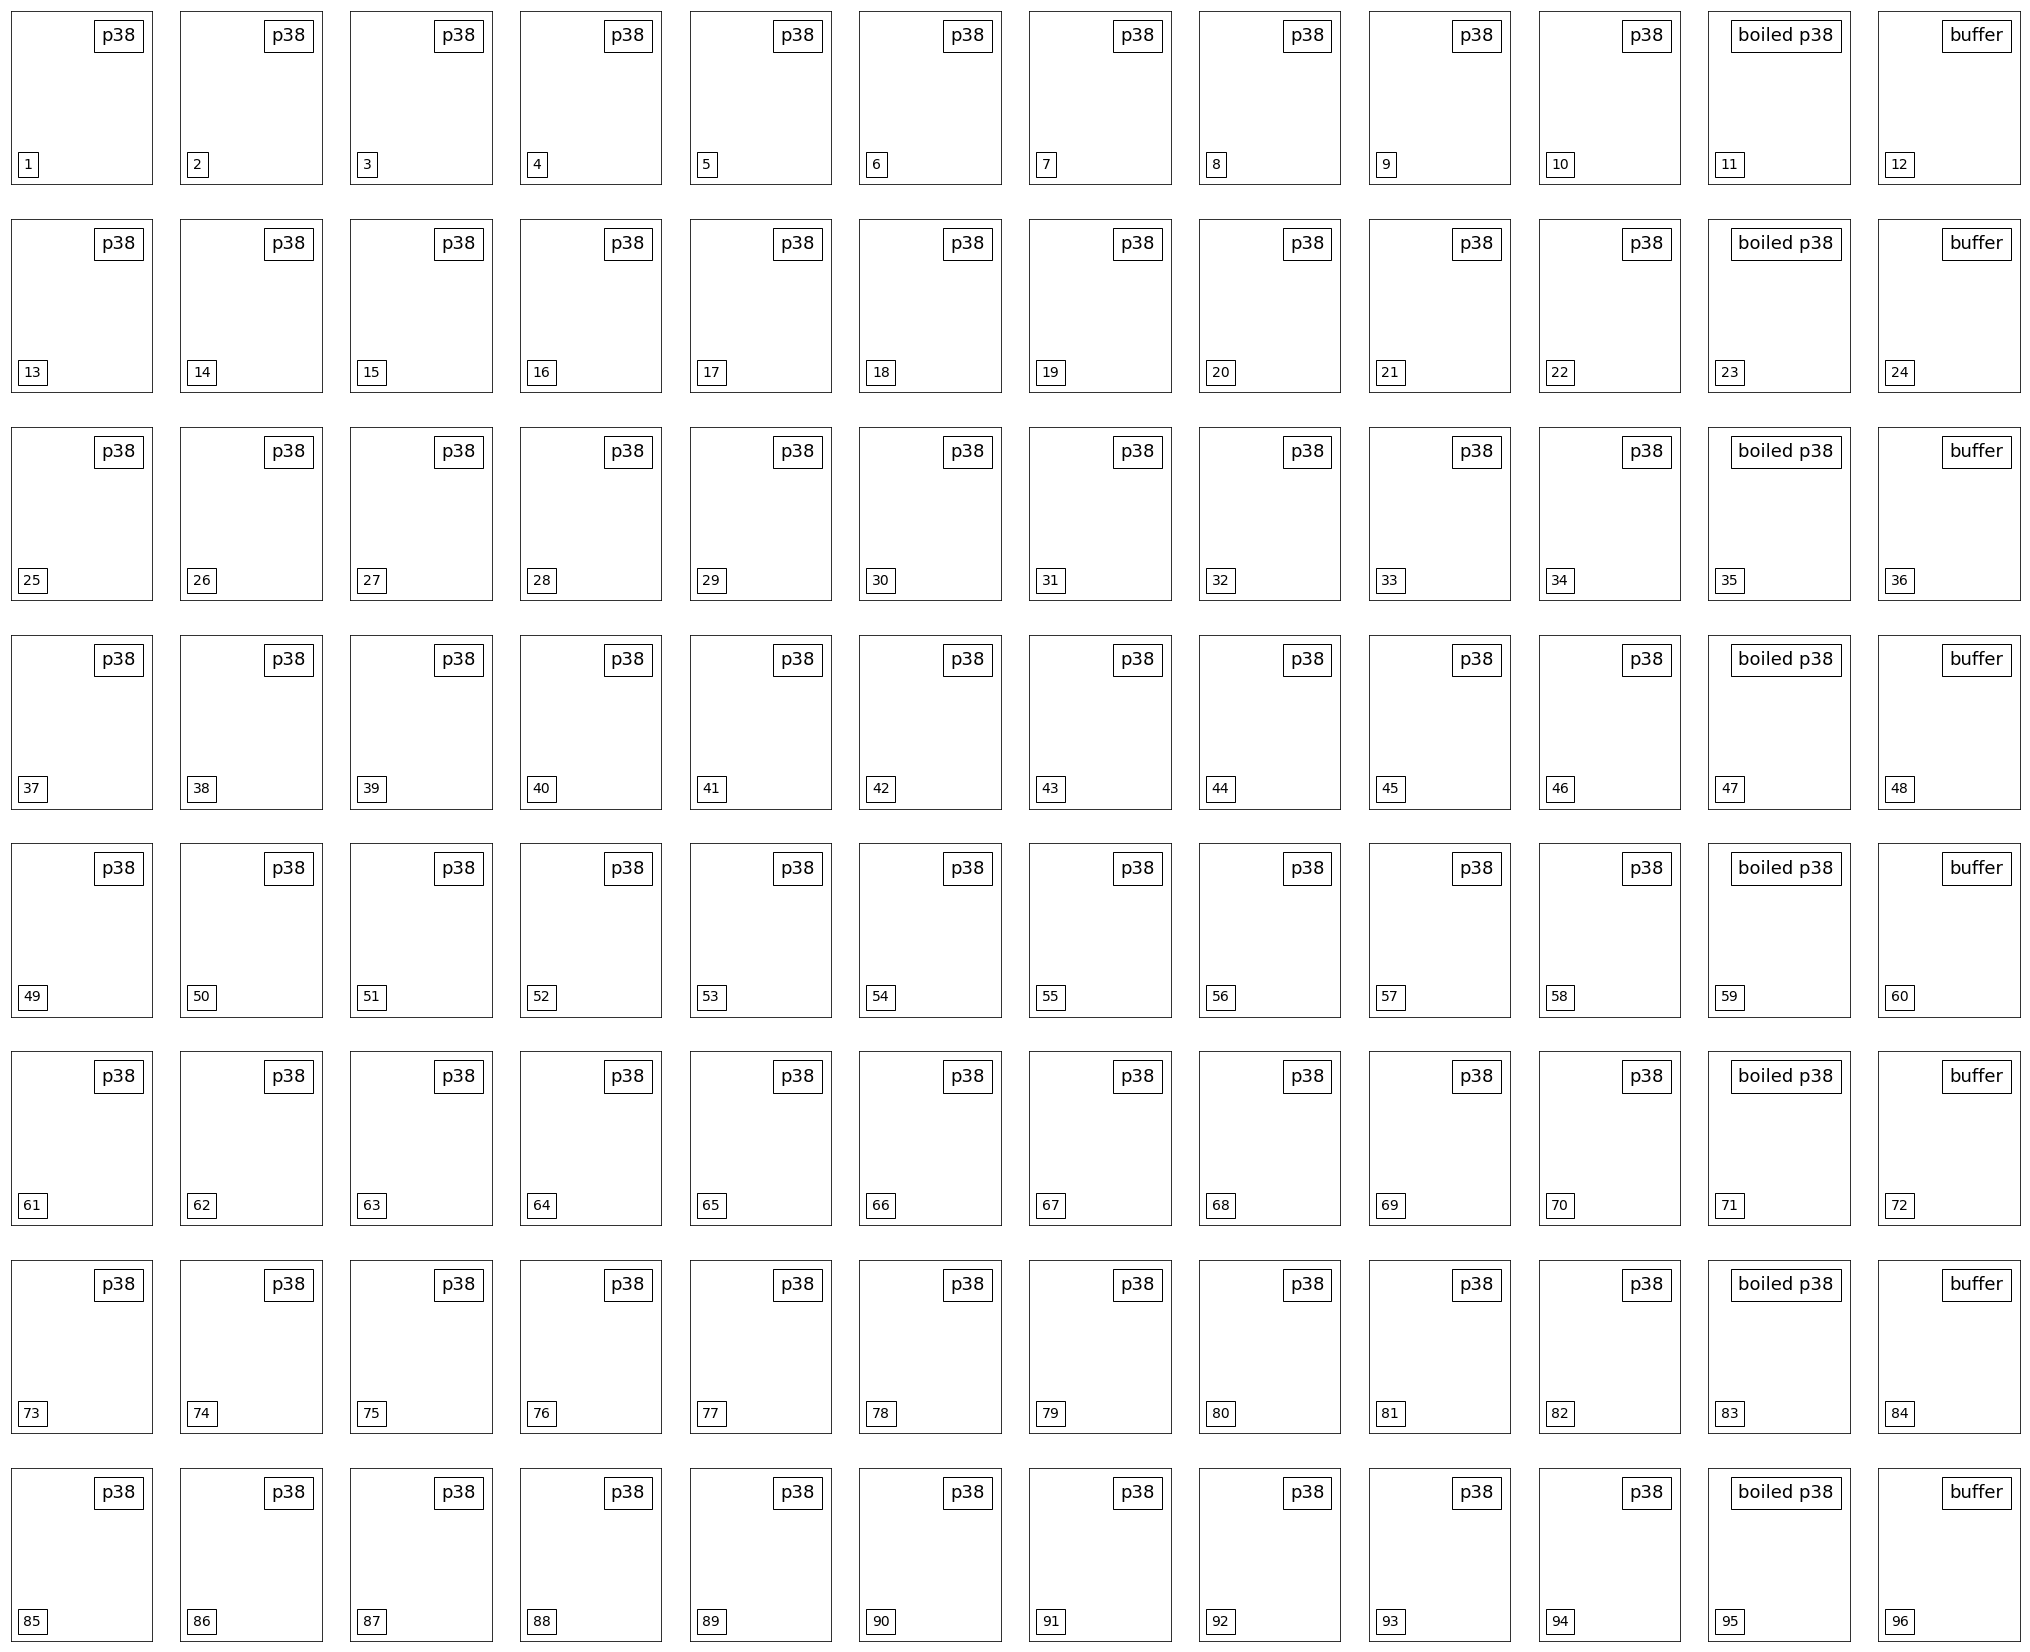

In [19]:



# In[19]:


nrows = 8
ncols = 12
index = 0

label = 'ex280_scan_top_gain100'

title = 'Specta Reads at 280nm'
data = np.zeros([nrows, ncols, nreads, 17], np.float64)
for row_index in range(nrows):
    for col_index in range(ncols):
        row = '%c' % (ord('A')+row_index)
        col = '%d' % (col_index+1)
        well = row + col
        x_values = list(reads[0][label][well].keys())
        measurements = [list(reads[i][label][well].values()) for i in range(nreads)]
        for i in range(nreads):
            measurements[i] = [x if x != 'OVER' else 0 for x in measurements[i]]
        data[row_index,col_index,:] = np.array(measurements)


# In[25]:

###### change nrows_fig from 5 to 8 and ncols_fig from 9 to 12 ######
nrows_fig = 8
ncols_fig = 12
nrows = 8
ncols = 12
index = 0
fig, axes = plt.subplots(nrows=nrows_fig, ncols=ncols_fig, figsize=[36,30])

label = 'ex280_scan_top_gain100'
title = 'Specta Reads at 280nm'



ymax = data.max().max().max()
xmax = max(list(reads[0][label][well].keys()))
xmin = min(list(reads[0][label][well].keys()))
c = list(concentrations)

for row_index in range(nrows):
    for col_index in range(ncols):
        row = '%c' % (ord('A')+row_index)
        col = '%d' % (col_index+1)
        well = row + col
        if len(list(plate_layout[plate_layout.well == well].name)) > 0:
            ax = plt.subplot(nrows_fig,ncols_fig,index+1)
            ########## change linspaces to 0,1,17 ###########
            gray = cm.Greys(np.linspace(0,1,17))
            for read, c in zip(data[4,3,:, 20:], gray):
                plt.semilogy(x_values[20:], read, c=c, alpha=.3, linewidth=3);

            if index in [35]:
                color=cm.Greys(np.linspace(0,1,17))
            else:
                color=cm.rainbow(np.linspace(0,1,17))
            for read, c in zip(data[row_index,col_index,:, 20:], color):
                plt.semilogy(x_values[20:], read, c=c, linewidth=2);

            #if index == 36:
            #    plt.xticks(np.arange(int(x_values[20]), 600, 40),x_values[20::8], rotation=90, fontsize=18)
            
            plt.xticks([]);
            plt.yticks([]);
            plt.ylim(0, ymax)
            if len(list(plate_layout[plate_layout.well == well].name)) > 0:
                anchored_text = AnchoredText('%s' % list(plate_layout[plate_layout.well == well].name)[0].split('_')[0], loc=1, prop=dict(size=18))
                ax.add_artist(anchored_text)
            ##### change index from 40 to 97 and from 18 to 20? #######
         #   if index == 97:
         #       plt.xlabel('Wavelength (nm)', fontsize=35, fontweight='bold')
         #   if index == 20:
         #       plt.ylabel('Fluorescence (AU)', fontsize=35, fontweight='bold')

            index += 1
            anchored_text2 = AnchoredText('%s' % (index),  loc=3, prop=dict(size=14))
            ax.add_artist(anchored_text2)

#micro_concentrations = np.multiply(concentrations, 1e6)
#norm = matplotlib.colors.BoundaryNorm(micro_concentrations, cm.rainbow.N)
#norm = matplotlib.colors.BoundaryNorm(micro_concentrations, cm.rainbow.N)
#conc_labels = ['{0:.3f}'.format(x) for x in micro_concentrations]
#cb = matplotlib.colorbar.ColorbarBase(cax, cmap='rainbow', norm=norm, ticks=micro_concentrations, boundaries=micro_concentrations)
#cb.set_label('Bosutinib Concentration ($\mu$M)', fontsize=35, fontweight='bold')
#cb.ax.tick_params(labelsize=25)
#cb.ax.set_yticklabels(conc_labels)

fig.savefig('bos_spectra_45_logy.pdf', bbox_inches='tight', dpi=300)




In [5]:
kinase_pos  = {
    'KC1G1': [0,11], 
    'DYR1A': [0, 10], 
    'VRK3': [0,1], 
    'PMYT1': [0,7], 
    'GAK': [0,2], 
    'KC1G3': [0,5], 
    'MK11': [1, 0], 
    'CSK': [0,3], 
    'STK3': [0,9], 
    'MK14': [0,0], 
    'VRK1': [0,4], 
    'MK13': [1,1], 
    'MK03': [0,8], 
    'FES': [0,6]
}

In [ ]:
kinase_pos[list(kinase_pos.keys())[0]][0]


In [ ]:
current_palette = sns.color_palette()

wavelength = '480'
fluorescence_color = current_palette[0]
deriv_color = current_palette[3]
lig_color = 'black'
ymax = data.max().max().max()

fig = plt.figure(figsize=(15,12), dpi=300)
for i,kinase in enumerate(list(kinase_pos.keys())):
    row = kinase_pos[kinase][0]
    column = kinase_pos[kinase][1]
    index = i + 1
    ax1 = fig.add_subplot(5,3,index)
    
    if i == 13: 
        plt.xlabel('Bosutinib Concentration (M)', fontsize=34)
    if i == 6: 
        plt.ylabel('Fluorescence (AU, 480nm)', fontsize=34)

    # Plot fluorescence
    plt.loglog(concentrations, data[row,column,:,x_values.index(wavelength)], c=fluorescence_color, marker='.', linestyle='None', markersize=12)
    plt.loglog(concentrations, data[4,3,:,x_values.index(wavelength)], c=color[colorindex], color='black', marker='.', linestyle='None', markersize=12)
    ax1.set_ylim(1000, 100000)
    #ax1.set_ylim(0, math.kymax)
    ax1.yaxis.set_tick_params(labelsize=15)
    ax1.xaxis.set_tick_params(labelsize=15)
    plt.legend(['protein + ligand', 'ligand'], loc=2)
    
    # Title subplot
    plt.title('%s' % kinase, fontsize=17, fontweight='bold')  
    
    if i < 12:
        ax1.xaxis.set_ticks([])
    if i not in [0, 3, 6, 9, 12]:
        ax1.yaxis.set_ticks([])
    
    

# Plot no detectable expression case
ax1 = fig.add_subplot(5,3,15)
plt.loglog(concentrations, data[4,3,:,x_values.index(wavelength)], c=color[colorindex], color='black', marker='.', linestyle='None', markersize=12)
plt.loglog(concentrations, data[4,4,:,x_values.index(wavelength)], c=color[colorindex], color='red', marker='.', linestyle='None', markersize=12)
plt.loglog(concentrations, data[4,5,:,x_values.index(wavelength)], c=color[colorindex], color='grey', marker='.', linestyle='None', markersize=12)
ax1.set_ylim(1000, 100000)
ax1.yaxis.set_ticks([])
ax1.xaxis.set_tick_params(labelsize=15)
# Make sure something is plotted for the derivative
#y = y * 0
#ax1.plot(temps4, y, color=deriv_color, linestyle=':')
#ax1.xaxis.set_ticks([30, 40, 50, 60, 70, 80, 90])
#plt.title('No detectable kinase expression', fontsize=18, fontweight='bold')

plt.legend(['ligand', 'MK14', 'boiled MK14']);

# Save figure
#fig.tight_layout()
fig.savefig('bos_15panel_%s.pdf' % wavelength, dpi=300)

In [ ]:
current_palette = sns.color_palette()

wavelength = '480'
fluorescence_color = current_palette[0]
deriv_color = current_palette[3]
lig_color = 'black'
ymax = data.max().max().max()

fig = plt.figure(figsize=(15,12), dpi=300)
for i,kinase in enumerate(list(kinase_pos.keys())):
    row = kinase_pos[kinase][0]
    column = kinase_pos[kinase][1]
    index = i + 1
    ax1 = fig.add_subplot(5,3,index)
    
    if i == 13: 
        plt.xlabel('Bosutinib Concentration (M)', fontsize=34)
    if i == 6: 
        plt.ylabel('Fluorescence (AU, 480nm)', fontsize=34)

    # Plot fluorescence
    plt.semilogx(concentrations, data[row,column,:,x_values.index(wavelength)], c=fluorescence_color, marker='.', linestyle='None', markersize=12)
    plt.semilogx(concentrations, data[4,3,:,x_values.index(wavelength)], c=color[colorindex], color='black', marker='.', linestyle='None', markersize=12)
    #ax1.set_ylim(1000, 100000)
    #ax1.set_ylim(0, math.kymax)
    ax1.yaxis.set_tick_params(labelsize=15)
    ax1.xaxis.set_tick_params(labelsize=15)
    plt.legend(['protein + ligand', 'ligand'], loc=2)
    
    # Title subplot
    plt.title('%s' % kinase, fontsize=17, fontweight='bold')  
    
    if i < 12:
        ax1.xaxis.set_ticks([])
  #  if i not in [0, 3, 6, 9, 12]:
        #ax1.yaxis.set_ticks([])
    
    

# Plot no detectable expression case
ax1 = fig.add_subplot(5,3,15)
plt.semilogx(concentrations, data[4,3,:,x_values.index(wavelength)], c=color[colorindex], color='black', marker='.', linestyle='None', markersize=12)
plt.semilogx(concentrations, data[4,4,:,x_values.index(wavelength)], c=color[colorindex], color='red', marker='.', linestyle='None', markersize=12)
plt.semilogx(concentrations, data[4,5,:,x_values.index(wavelength)], c=color[colorindex], color='grey', marker='.', linestyle='None', markersize=12)
#ax1.set_ylim(1000, 100000)
#ax1.yaxis.set_ticks([])
ax1.xaxis.set_tick_params(labelsize=15)
# Make sure something is plotted for the derivative
#y = y * 0
#ax1.plot(temps4, y, color=deriv_color, linestyle=':')
#ax1.xaxis.set_ticks([30, 40, 50, 60, 70, 80, 90])
#plt.title('No detectable kinase expression', fontsize=18, fontweight='bold')

plt.legend(['ligand', 'MK14', 'boiled MK14']);

# Save figure
#fig.tight_layout()
fig.savefig('bos_15panel_%s_logx.pdf' % wavelength, dpi=300)

In [ ]:
conda